In [6]:
!pip install kaggle

In [7]:
#configuration the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#dataset api
!kaggle competitions download -c cifar-10

 99% 708M/715M [00:11<00:00, 81.8MB/s]
100% 715M/715M [00:11<00:00, 67.8MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
#extractiong the compessed dataset

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 33.5 MB/s eta 0:00:00


In [13]:
from ast import mod
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**Importing the dependenceis**

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [16]:
filenames = os.listdir('/content/train')

In [17]:
type(filenames)

list

In [18]:
len(filenames)

50000

In [19]:
#print fast and last 5 data
print(filenames[0:5])
print(filenames[-5:])

['34319.png', '34492.png', '24623.png', '17833.png', '23099.png']
['48392.png', '20013.png', '330.png', '27552.png', '34316.png']


**Labels Processing**

In [21]:
#read csv labels into pandas data structure
labels_df = pd.read_csv('/content/trainLabels.csv')

In [22]:
labels_df.shape

(50000, 2)

In [23]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [24]:
labels_df[labels_df['id'] == 34319]

,id,label
34318,34319,airplane


In [25]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [26]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [27]:
#unique vales in label

labels_df['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [28]:
#values counts

labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [30]:
#convert catagorical 'labels' to neumerical type

labels_dictonary = {'frog':0, 'truck':1, 'deer':2, 'automobile':3, 'bird':4, 'horse':5, 'ship':6, 'cat':7, 'dog':8, 'airplane':9}

labels = [labels_dictonary[i] for i in labels_df['label']]

In [33]:
print(labels[0:5])
print(labels[-5:])

[0, 1, 1, 2, 3]
[4, 0, 1, 3, 3]


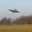

In [35]:
#displaing a sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/34319.png')
cv2_imshow(img)

In [36]:
labels_df[labels_df['id'] == 34319]

,id,label
34318,34319,airplane


In [37]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [39]:
id_list = list(labels_df['id'])

In [41]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [43]:
#convert image to numpy array

train_data_folder = '/content/train'

data = []

for id in id_list:
  image = Image.open(train_data_folder + '/' + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [44]:
type(data)

list

In [45]:
len(data)

50000

In [46]:
type(data[0])

numpy.ndarray

In [47]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
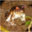

In [48]:
data[0]

In [49]:
#convert image list and label list to numpy arrray

x = np.array(data)
y = np.array(labels)

In [50]:
type(x)

numpy.ndarray

In [51]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [53]:
print (x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [54]:
#scaling data 0 to 1 range. so devide by 255

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [55]:
x_train_scaled

array([[[[0.56470588, 0.72156863, 0.83921569],
         [0.55686275, 0.70980392, 0.82352941],
         [0.55686275, 0.70980392, 0.82745098],
         ...,
         [0.56470588, 0.70980392, 0.81568627],
         [0.56470588, 0.70980392, 0.81568627],
         [0.56078431, 0.70980392, 0.81176471]],

        [[0.55686275, 0.70980392, 0.82352941],
         [0.54901961, 0.69803922, 0.81176471],
         [0.55294118, 0.70196078, 0.81568627],
         ...,
         [0.56078431, 0.70196078, 0.80392157],
         [0.55686275, 0.70196078, 0.80392157],
         [0.55294118, 0.69803922, 0.8       ]],

        [[0.56470588, 0.71764706, 0.83529412],
         [0.55294118, 0.70588235, 0.81960784],
         [0.55686275, 0.70980392, 0.82352941],
         ...,
         [0.56862745, 0.71372549, 0.81568627],
         [0.56078431, 0.70588235, 0.80784314],
         [0.55686275, 0.70196078, 0.80392157]],

        ...,

        [[0.52156863, 0.61176471, 0.6745098 ],
         [0.34901961, 0.38431373, 0.42352941]

**Building Neural Network**

In [57]:
import tensorflow as tf
from tensorflow import keras

In [67]:
num_of_classes = 10

#setting up the layers of neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),  #hiddel layer 1
    keras.layers.Dense(64, activation='relu'),    #hiddel layer 2
    keras.layers.Dense(num_of_classes, activation='softmax')    #input layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
#compile the neural network
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
#training the neural network

model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2593 - loss: 2.0293 - val_accuracy: 0.3347 - val_loss: 1.8177
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3690 - loss: 1.7649 - val_accuracy: 0.3905 - val_loss: 1.6887
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4014 - loss: 1.6801 - val_accuracy: 0.4103 - val_loss: 1.6465
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4239 - loss: 1.6201 - val_accuracy: 0.4300 - val_loss: 1.6051
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4366 - loss: 1.5795 - val_accuracy: 0.3983 - val_loss: 1.6765
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4444 - loss: 1.5579 - val_accuracy: 0.4288 - val_loss: 1.5846
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4588 - loss: 1.5259 - val_accuracy: 0.4367 - val_loss: 1.5748
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4598 - loss: 1.4959 - 

**Here used just a normal Neural Network.**

**so accuracy comes very low. only 0.497**

**Now Use ResNet50**

In [70]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [71]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
#in dataset input img size is (32,32,3)
#but resnet50 worked only (256,256,3)
#so we need reshape


convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [73]:
#setting up ResNet50

number_of_classes = 10

model = models.Sequential()
#convert(32,32,3) to (256,256,3)
model.add(layers.UpSampling2D((2,2)))    #its convert (64,64,3)
model.add(layers.UpSampling2D((2,2)))    #its convert (128,128,3)
model.add(layers.UpSampling2D((2,2)))    #its convert (256,256,3)
model.add(convolutional_base)
model.add(layers.Flatten())
#hiddel layer 1
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
#hidden layer 2
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
#input layer
model.add(layers.BatchNormalization())
model.add(layers.Dense(number_of_classes, activation='softmax'))


In [77]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [78]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 355ms/step - acc: 0.3271 - loss: 2.0299 - val_acc: 0.7795 - val_loss: 0.8807
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 412s 352ms/step - acc: 0.6751 - loss: 1.0830 - val_acc: 0.8813 - val_loss: 0.5011
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.7940 - loss: 0.7780 - val_acc: 0.9095 - val_loss: 0.3885
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.8614 - loss: 0.5878 - val_acc: 0.9237 - val_loss: 0.3132
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 345ms/step - acc: 0.9028 - loss: 0.4595 - val_acc: 0.9247 - val_loss: 0.2830
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 344ms/step - acc: 0.9320 - loss: 0.3646 - val_acc: 0.9317 - val_loss: 0.2511
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 344ms/step - acc: 0.9508 - loss: 0.2958 - val_acc: 0.9345 - val_loss: 0.2429
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 344ms/step - acc: 0.9615 - loss: 0.2431 - val_acc: 0.9388 - val_loss: 0.2308
Epoch 9/

In [79]:
#test accuracy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - acc: 0.9421 - loss: 0.2116
Test Accuracy =  0.9401000142097473


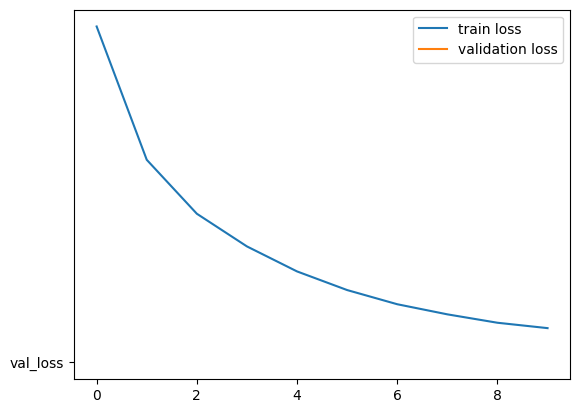

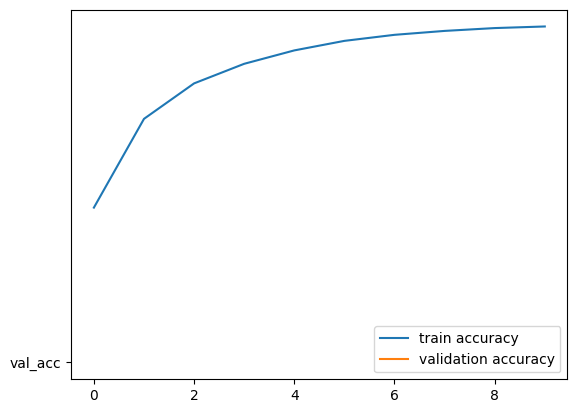

In [82]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Save as train Pickel File**

In [81]:
import pickle

# ... (your existing code) ...

# After training the model (after model.fit)
with open('Object Recognition.pkl', 'wb') as file:
  pickle.dump(model, file)

print("Model saved as Object Recognition_model.pkl")

Model saved as Object Recognition_model.pkl
